In [1]:
from sklearn.datasets import load_boston
import numpy as np
import pandas as pd
from sklearn import cross_validation, tree, metrics

In [20]:
boston = load_boston()
X = boston.data
Y = boston.target
#X_train, X_test, y_train, y_test = cross_validation.train_test_split(boston.data, boston.target, test_size = 0.25, random_state = 1)
X_train = X[:X.shape[0]*0.75,:]
X_test = X[X.shape[0]*0.75:,:]
y_train = Y[:X.shape[0]*0.75]
y_test = Y[X.shape[0]*0.75:]

C:\Users\yuranich\Anaconda2\envs\py35\lib\site-packages\ipykernel\__main__.py:5: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\yuranich\Anaconda2\envs\py35\lib\site-packages\ipykernel\__main__.py:6: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\yuranich\Anaconda2\envs\py35\lib\site-packages\ipykernel\__main__.py:7: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\yuranich\Anaconda2\envs\py35\lib\site-packages\ipykernel\__main__.py:8: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [21]:
def gbm_predict(X):
    return [sum([coeff * algo.predict([x])[0] for algo, coeff in zip(basics, ws)]) for x in X]

In [22]:
basics = []
ws = []
y_cur = np.array(y_train)
for i in range(50):
    regr = tree.DecisionTreeRegressor(max_depth=5, random_state=42).fit(X_train, y_cur)
    basics.append(regr)
    ws.append(0.9)
    y_cur = y_train - gbm_predict(X_train)
    

In [23]:
gbm_predict(X_test)

[14.078512377151375,
 15.487864741644511,
 14.136095980085559,
 15.706221564579131,
 15.114453412890773,
 17.07854208356321,
 15.36294207271677,
 15.372671301448255,
 17.741313170238485,
 15.41355768446858,
 14.456994570928947,
 15.773972215147941,
 18.312219425594183,
 15.413900779184758,
 21.658881284367091,
 16.375248741129333,
 14.998938845848151,
 14.063185553087875,
 15.155909404482522,
 16.066291931469824,
 17.779401628905635,
 15.736423492039815,
 13.876935518260241,
 14.073808950752511,
 15.442171971590989,
 16.870344926894006,
 16.299587933756825,
 14.102480329532984,
 21.489864331787238,
 14.901617741099548,
 13.88148729671309,
 21.863318180355286,
 13.115910432467064,
 14.903547188737395,
 14.94967113444209,
 14.874090294938334,
 13.147139072774754,
 13.762799337308792,
 17.151697695663557,
 15.06958108469953,
 16.25777846193699,
 19.334623305674821,
 19.774863120118571,
 22.148697624304472,
 15.834009014545119,
 19.769742934156319,
 15.098792367856772,
 23.504167645204681,

In [24]:
np.sqrt(metrics.mean_squared_error(y_test, gbm_predict(X_test)))

5.4766509741689484

In [25]:
basics = []
ws = []
y_cur = np.array(y_train)
for i in range(50):
    regr = tree.DecisionTreeRegressor(max_depth=5, random_state=42).fit(X_train, y_cur)
    basics.append(regr)
    ws.append(0.9/(1.0+i%10))
    y_cur = y_train - gbm_predict(X_train)

print(ws)

[0.9, 0.45, 0.3, 0.225, 0.18, 0.15, 0.1285714285714286, 0.1125, 0.1, 0.09, 0.9, 0.45, 0.3, 0.225, 0.18, 0.15, 0.1285714285714286, 0.1125, 0.1, 0.09, 0.9, 0.45, 0.3, 0.225, 0.18, 0.15, 0.1285714285714286, 0.1125, 0.1, 0.09, 0.9, 0.45, 0.3, 0.225, 0.18, 0.15, 0.1285714285714286, 0.1125, 0.1, 0.09, 0.9, 0.45, 0.3, 0.225, 0.18, 0.15, 0.1285714285714286, 0.1125, 0.1, 0.09]


In [26]:
np.sqrt(metrics.mean_squared_error(y_test, gbm_predict(X_test)))

4.9284335307034981

In [32]:
from sklearn.ensemble import GradientBoostingRegressor
%pylab inline

Populating the interactive namespace from numpy and matplotlib


[8.8140385834775916, 7.4519049493353506, 6.7522891557278406]
[8.2617228931868549, 6.680039215523534, 5.8192098489459578]
[8.436391618751891, 6.9423814364068095, 6.142216262313819]
[8.7010135212469564, 7.3800253676538983, 6.6712927520260115]
[8.6172341033509774, 7.1007828828259365, 6.4111697182257625]
[8.6821913040119956, 7.3510296785250313, 6.6243348847655978]
Wall time: 5.14 s


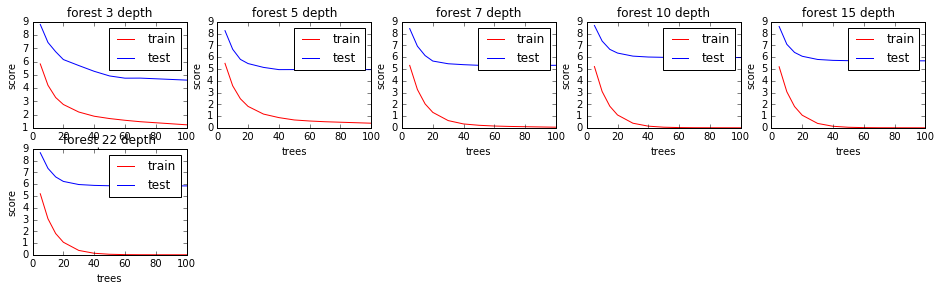

In [36]:
%%time
trees = np.array([5, 10, 15, 20, 30, 40, 50, 60, 70, 100])
depths = np.array([3, 5, 7, 10, 15, 22])
pyplot.figure(figsize=(16, 11))
i = 1
for d in depths:
    scores_train = []
    scores_test = []
    for num in trees:
        boost = GradientBoostingRegressor(n_estimators=num, max_depth=d, random_state=42).fit(X_train, y_train)
        scores_train.append(np.sqrt(metrics.mean_squared_error(y_train, boost.predict(X_train))))
        scores_test.append(np.sqrt(metrics.mean_squared_error(y_test, boost.predict(X_test))))
    print(scores_test[:3])
    ax = plt.subplot(5, 5, i)
    ax.set_title("forest {} depth".format(d))
    pyplot.plot(trees, scores_train, color="red", label="train")
    pyplot.plot(trees, scores_test, color="blue", label="test")
    pyplot.xlabel("trees")
    pyplot.ylabel("score")
    pyplot.legend()
    i += 1

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
lin = LinearRegression().fit(X_train, y_train)
pred = lin.predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test, pred))

8.2704680349381601